In [ ]:
import numpy as np
import geatpy as ea
import torch 
import sys
sys.path.append("..")
from predictor.mlp import FeedforwardNet
sys.path.append("../encode+decode/")
from decode import decode,decode_lite
from flops_params import flops_params
def init_pop(acc=91):
    data= np.load("/home/qhy/Reserach/AICAS/predictor/dataset/data-dict-980.npy",allow_pickle=True).item()
    pop_init = []
    num = []
    for k in data.keys():
        if data[k]['acc'] > acc:
            pop_init.append(np.array(data[k]['code'])*np.array([8]*5+[1]*16))
            num.append(k)
    return pop_init,len(num)
# 0 1 搜索得到的是相同的
# 12 4 18
model_paths = ["loss-mse-input_dims-21-num_layers-4-layer_width-40_30_20_10-lr-0.1-regular-0.1-r-train-0.8998-r-test-0.8791.pth",
                "loss-mse-input_dims-21-train_num-350-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.8885-r-test-0.9139-diff2-1664.4902.pth",
                "loss-mse-input_dims-21-num_layers-4-layer_width-40_30_20_10-lr-0.1-regular-0.1-r-train-0.9102-r-test-0.9068.pth",
                "loss-pair+mse-input_dims-21-train_num-400-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9795-r-test-0.9484-diff2-406.5385.pth",
                "loss-mse-input_dims-21-train_num-400-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.8857-r-test-0.9172-diff2-529.2692.pth",
                "loss-pair+mse-input_dims-21-train_num-300-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9673-r-test-0.9098-diff2-3871.9474.pth",
                "input_dims-21-num_layers-3-layer_width-30_20_10-lr-0.1-regular-0.2.pth",
                "loss-pair+mse-ratio-1e-06-input_dims-21-train_num-300-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9529-r-test-0.9257-diff2-3184.0789.pth",
                "loss-pair+mse-input_dims-21-train_num-300-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9526-r-test-0.9256-diff2-3472.1184.pth",
                "loss-pair+mse-ratio-5e-06-input_dims-21-train_num-300-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9669-r-test-0.9415-diff2-4087.6842.pth",
                "loss-mse-input_dims-21-num_layers-3-layer_width-30_20_10-lr-0.1-regular-0.1-r-train-0.9042-r-test-0.8883.pth",
                "loss-pair+mse-ratio-5e-05-input_dims-21-train_num-300-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9824-r-test-0.9419-diff2-3951.1184.pth",
                # "loss-mse-input_dims-21-num_layers-4-layer_width-40_30_20_10-lr-0.1-regular-0.1-r-train-0.9238-r-test-0.9443.pth",
                "loss-mse-ratio-5e-06-input_dims-21-train_num-300-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.8906-r-test-0.8956-diff2-3412.1842.pth",
                "loss-pair+mse-input_dims-21-train_num-300-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9266-r-test-0.8862-diff2-4311.2632.pth",
                "loss-pair+mse-ratio-1e-06-input_dims-21-train_num-300-num_layers-6-layer_width-40_80_60_40_20_10-lr-0.1-regular-0.1-r-train-0.9605-r-test-0.9204-diff2-3194.2632.pth",
                "loss-mse-ratio-5e-06-input_dims-21-train_num-300-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.8991-r-test-0.9009-diff2-3679.3816.pth",
                "loss-mse-input_dims-21-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9334-r-test-0.9409.pth",
                "loss-pair+mse-input_dims-21-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.971-r-test-0.9586.pth",
                "loss-mse-input_dims-21-num_layers-5-layer_width-40_80_40_20_10-lr-0.1-regular-0.1-r-train-0.9073-r-test-0.9154-diff2-18464.pth",
                "loss-mse-ratio-5e-06-input_dims-21-train_num-300-num_layers-6-layer_width-40_80_60_40_20_10-lr-0.1-regular-0.1-r-train-0.8755-r-test-0.8831-diff2-3972.8684.pth",
               ]
# model_path = "/home/qhy/Reserach/AICAS/predictor/MLP/cifar10/"+model_paths[3] #21
model_path = "/home/qhy/Reserach/AICAS/predictor/MLP/cifar10/"+'loss-mse-ratio-1e-05-input_dims-21-train_num-400-num_layers-5-layer_width-40_80_40_20_10-lr-0.01-regular-0.1-r-train-0.9738-r-test-0.713-diff2-1688.4561.pth'
model_param = torch.load(model_path)
hyperparams = model_param["hyperparams"]
predictor = FeedforwardNet(hyperparams["input_dims"],hyperparams["num_layers"],hyperparams["layer_width"],1,'relu')
predictor.load_state_dict(model_param['model'])

class EA_S(ea.Problem):  # 继承Problem父类
    def __init__(self,model):
        name = 'EA'  # 初始化name（函数名称，可以随意设置）
        M = 1  # 优化目标个数
        maxormins = [1] *M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = M  # 初始化Dim（决策变量维数）
        varTypes = [1] * 21  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [1]*5+[0]*5+[0]*6+[1]*5  # 决策变量下界
        ub = [8]*5+[1]*5+[2]*6+[2,4,6,8,4]  # 决策变量上界
        lbin = [1]*21  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1]*21  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        self.predictor = model
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def aimFunc(self, pop):  # 目标函数
        Vars = pop.Phen  # 获取决策变量矩阵，它等于种群的表现型矩阵Phen
        Vars = torch.tensor(np.array(Vars,dtype=np.float32))
        accuracy = []
        flops = []
        params = []
        
        for i in range(Vars.shape[0]):
            acc = self.predictor(Vars[i]*1.0).detach().numpy()*-1
            # print(Vars[i])
            f,p = flops_params(Vars[i].detach().cpu().numpy())
            accuracy.append(acc+f/150+p/3) 
            # accuracy.append(acc) 
            
        accuracy = np.array(accuracy)
        pop.ObjV = np.hstack([accuracy])  # 计算目标函数值矩阵，赋值给种群对象的ObjV属性
        # pop.CV = -Vars ** 2 + 2.5 * Vars - 1.5  # 构建违反约束程度矩阵，赋值给种群对象的CV属性
class EA_M(ea.Problem):  # 继承Problem父类
    def __init__(self,model):
        name = 'EA'  # 初始化name（函数名称，可以随意设置）
        M = 2  # 优化目标个数
        maxormins = [1] *M  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = M  # 初始化Dim（决策变量维数）
        varTypes = [1] * 21  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [1]*5+[0]*5+[0]*6+[1]*5  # 决策变量下界
        ub = [8]*5+[1]*5+[2]*6+[2,4,6,8,4]  # 决策变量上界
        lbin = [1]*21  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1]*21  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        self.predictor = model
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def aimFunc(self, pop):  # 目标函数
        Vars = pop.Phen  # 获取决策变量矩阵，它等于种群的表现型矩阵Phen
        Vars = torch.tensor(np.array(Vars,dtype=np.float32))
        accuracy = []
        flops = []
        params = []
        
        for i in range(Vars.shape[0]):
            acc = self.predictor(Vars[i]*1.0).detach().numpy()*-1
            f,p = flops_params(Vars[i].detach().cpu().numpy())
            accuracy.append(acc) 
            flops.append(f/100)
            params.append(p)
        flops = np.expand_dims(np.array(flops), axis=1)
        params = np.expand_dims(np.array(params), axis=1)

        accuracy = np.array(accuracy)
        pop.ObjV = np.hstack([accuracy,flops])  # 计算目标函数值矩阵，赋值给种群对象的ObjV属性
        # pop.CV = -Vars ** 2 + 2.5 * Vars - 1.5  # 构建违反约束程度矩阵，赋值给种群对象的CV属性
# 实例化问题对象
# problem = EA_M(predictor)
problem = EA_M(predictor)

# 构建算法
pop_init,pop_num = init_pop(acc=91)

# soea_SEGA_templet
# soea_DE_best_1_L_templet 13 14 34
# soea_DE_best_1_bin_templet 15 33
# soea_DE_currentToBest_1_L_templet 16 equal to soea_DE_targetToBest_1_bin_templet
# soea_DE_currentToBest_1_bin_templet 17 32 44
# soea_DE_currentToRand_1_templet 18 31
# soea_DE_rand_1_L_templet 19 30
# soea_DE_rand_1_bin_templet 20 29
# soea_DE_targetToBest_1_L_templet 21 equal to soea_DE_targetToBest_1_bin_templet
# soea_DE_targetToBest_1_bin_templet 22，27
# soea_ES_1_plus_1_templet 23 28
# algorithm = ea.soea_DE_currentToBest_1_bin_templet(problem,
#                                 ea.Population(Encoding='RI', NIND=pop_num),
#                                 MAXGEN=500,  # 最大进化代数。
#                                 logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
#                                 trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
#                                 maxTrappedCount=10)  # 进化停滞计数器最大上限值。

# moea_NSGA2_templet 36
# moea_awGA_templet 37
# moea_psy_awGA_templet 
# updateNDSet 
# moea_MOEAD_DE_templet equal 33
# moea_MOEAD_archive_templet equal 33
# moea_MOEAD_templet equal 33
# moea_NSGA2_DE_templet 38
# moea_NSGA2_templet equal 36
# moea_NSGA3_DE_templet 39
# moea_PPS_MOEAD_DE_archive_templet 40
# moea_RVEA_RES_templet 41
# moea_RVEA_templet 42
algorithm = ea.moea_NSGA2_templet(problem,
                                ea.Population(Encoding='RI', NIND=pop_num),
                                MAXGEN=500,  # 最大进化代数。
                                logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
                                maxTrappedCount=10)  # 进化停滞计数器最大上限值。

# 求解
res = ea.optimize(algorithm, seed=1, verbose=False,prophet=np.array(pop_init,dtype=np.float32), drawing=1, outputMsg=True, drawLog=False, saveFlag=False, dirName='result')
# res = ea.optimize(algorithm, seed=1, verbose=False, drawing=1, outputMsg=True, drawLog=False, saveFlag=False, dirName='result')

# 

In [4]:
import sys
sys.path.append("../encode+decode/")
from decode import decode
con_map = {0:"acc+flops+params",1:"acc",2:"acc+flops",3:"acc+params",4:"flops",5:"params",6:"param+flops"}
n = 84
decode(list(res['Vars'][0].astype(int)),"cifar10",n=n,save=False,constrain = con_map[0])  
# decode(list(res['Vars'][0].astype(int)),"cifar10",n=n,save=False,constrain = con_map[0])  

        

-  1.0
-  1.0
-  1.0
-  1.0
-  0.125
-  2
-  4
-  4
-  1
-  4
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
|84|2-4-4-1-4|1.0-1.0-1.0-1.0-0.125|repvgg-repvgg-vgg-vgg-vgg|False-False-False-False-False|None-None-None-None-None-None|cifar10|116.2|1.26||acc+flops+params|


In [ ]:
# 27
[0.75, 0.75, 0.625, 0.125, 0.125]
[2, 2, 1, 5, 4]
# 28
[0.5, 0.125, 0.125, 0.25, 0.875]
[1, 4, 1, 1, 1]
# 29
[1.0, 0.5, 0.75, 0.125, 1.0]
[1, 1, 1, 2, 1]
# 30
[1.0, 0.5, 0.5, 0.5, 0.125]
[1, 3, 1, 1, 3]
# 31
[1.0, 1.0, 0.625, 0.125, 0.125]
[2, 1, 2, 7, 4]
# 32
[0.375, 0.75, 0.75, 0.375, 0.375]
[2, 1, 1, 1, 1]
#从65开始 多目标优化了

In [5]:
# for i in range(10,16):
#     print(i,vgg16[i])

In [6]:
# vgg16 = [8.0,8.0,8.0,8.0,8.0,1,1,1,1,1,2,0,0,0,0,0,2,2,3,3,3]
# decode(vgg16,"cifar10",n=48,save=True,constrain = con_map[0])  

In [14]:
import numpy as np
def init_pop(acc=91):
    data= np.load("/home/qhy/Reserach/AICAS/predictor/dataset/data-dict-980.npy",allow_pickle=True).item()
    pop_init = []
    num = []
    for k in data.keys():
        if data[k]['acc'] > acc:
            pop_init.append(np.array(data[k]['code'])*np.array([8]*5+[1]*16))
            num.append(k)
    return pop_init,len(num)
pop_init,num = init_pop(acc=91)
print(pop_init[0])

[8. 8. 8. 3. 6. 0. 0. 1. 0. 0. 2. 2. 1. 1. 1. 2. 2. 2. 5. 5. 3.]


## Hardware and Software Co-design

In [3]:
from latency import *

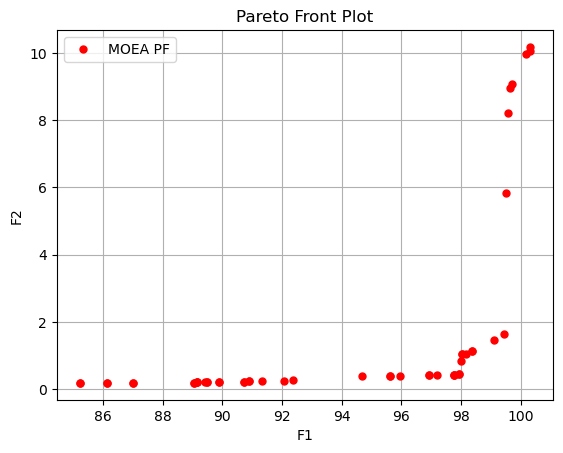

Execution time: 799.9396331310272 s
Evaluation number: 2500
The number of non-dominated solutions is: 50
hv: 0.22396
spacing: 0.39383


In [4]:
class EA_M(ea.Problem):  # 继承Problem父类
    def __init__(self,model):
        name = 'EA'  # 初始化name（函数名称，可以随意设置）
        M = 2  # 优化目标个数
        maxormins = [-1, 1]   # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = M  # 初始化Dim（决策变量维数）
        varTypes = [1] * 31  # 初始化varTypes（决策变量的类型，0：实数；1：整数）
        lb = [1]*5+[0]*5+[0]*6+[1]*5+[1]*5+[3]+[1]*4  # 决策变量下界
        ub = [8]*5+[1]*5+[2]*6+[2,4,6,8,4]+[5]*5+[3]+[5]*4  # 决策变量上界
        lbin = [1]*31  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1]*31  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        self.predictor = model
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def aimFunc(self, pop):  # 目标函数
        Vars = pop.Phen  # 获取决策变量矩阵，它等于种群的表现型矩阵Phen
        Vars = torch.tensor(np.array(Vars,dtype=np.float32))
        np_Vars = np.array(Vars,dtype=np.float32)
        accuracy = []
        latency = []
        BRAM = []
        DSP = []
        r_shift = [9]*30
        classify = 10
        for i in range(Vars.shape[0]):
            acc = self.predictor(Vars[i][:21]*1.0).detach().numpy()
            accuracy.append(acc) 
            code = np_Vars[i][:21]/np.array([8]*5+[1]*16)
            channels = [64,64,128,256,512]
            layers = np_Vars[i][16:21].astype(int)
            out_channels = []
            for out_ch in range(5):
                out_channels += [(code[out_ch]*channels[out_ch]).astype(int)]*layers[out_ch]
            in_channels = [3]+out_channels[:-1]
            pe = []
            out_ch = 0
            for p in range(5):
                for layer_num in range(int(np_Vars[i][16+p])):
                    while out_channels[out_ch] % (2**int(np_Vars[i][21+p])) != 0:
                        np_Vars[i][21+p] -= 1
                    pe += [2**int(np_Vars[i][21+p])]
                    out_ch += 1
                Vars[i][21+p].data = torch.tensor(np_Vars[i][21+p])
            if int(np_Vars[i][16])==2:
                simd = [int(np_Vars[i][26])]+[int(np_Vars[i][0]/8*64*0.5)]
                in_ch = 2
            else:
                simd = [int(np_Vars[i][26])]
                in_ch = 1

            for si in range(4):
                for layer_num in range(int(np_Vars[i][17+si])):
                    while in_channels[in_ch] % (2**int(np_Vars[i][27+si])) != 0:
                        np_Vars[i][27+si] -= 1
                    simd += [2**int(np_Vars[i][27+si])]
                    in_ch += 1
                Vars[i][27+si].data = torch.tensor(np_Vars[i][27+si])
            # if int(np_Vars[i][16])==2:
            #     simd = [int(np_Vars[i][26])]+[int(np_Vars[i][0]/8*64*0.5)]
            # else:
            #     simd = [int(np_Vars[i][26])]
            # Vars[i][26].data = torch.tensor(np_Vars[i][26])
            # for si in range(4):
            #     while in_channels[1+si] % (2**int(np_Vars[i][27+si])) != 0:
            #         np_Vars[i][27+si] -= 1
            #     simd += [2**int(np_Vars[i][27+si])]*int(np_Vars[i][17+si])
            #     Vars[i][27+si].data = torch.tensor(np_Vars[i][27+si])
                # [2**int(np_Vars[i][27])]*int(np_Vars[i][17])+[2**int(np_Vars[i][28])]*int(np_Vars[i][18])+[2**int(np_Vars[i][29])]*int(np_Vars[i][19])+[2**int(np_Vars[i][30])]*int(np_Vars[i][20])
            
            # print(in_channels,out_channels,code[:5],code[:5]*np.array([64,64,128,256,512]),pe,simd)
            # print(Vars[i])
            config = model_analysis(code, pe, simd, r_shift, classify)
            conv_param, conv_config = config_param(code, config)
            bram, dsp, cycle = hw_inference(code, config)
            latency.append([cycle])
            BRAM.append(bram)
            DSP.append(dsp)
        accuracy = np.array(accuracy)
        latency = np.array(latency)
        # print(accuracy.shape)
        # print(latency.shape)
        pop.ObjV = np.hstack([accuracy,latency])  # 计算目标函数值矩阵，赋值给种群对象的ObjV属性
        pop.CV = np.array([np.array(BRAM)-1824*2,np.array(DSP)-2520]).transpose(1,0)  # 构建违反约束程度矩阵，赋值给种群对象的CV属性
        # print(pop.CV.shape,pop.CV.ndim,pop.sizes)
# 实例化问题对象
# problem = EA_M(predictor)
problem = EA_M(predictor)
algorithm = ea.moea_NSGA2_templet(problem,
                                ea.Population(Encoding='RI', NIND=50),
                                MAXGEN=50,  # 最大进化代数。
                                logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
                                maxTrappedCount=10)  # 进化停滞计数器最大上限值。

# 求解
res = ea.optimize(algorithm, seed=1, verbose=False, drawing=1, outputMsg=True, drawLog=False, saveFlag=False, dirName='result')


In [11]:
import os
import sys
sys.path.append("/home/qhy/Reserach/AICAS")
from thop import profile 
from models import model as M
import copy
# from utils import repvgg_model_convert
def repvgg_model_convert(model, do_copy=True):
    if do_copy:
        deploy_model = copy.deepcopy(model)
    for module in deploy_model.modules():
        if hasattr(module, 'switch_to_deploy'):
            module.switch_to_deploy()
    return deploy_model
import yaml
import torch
def save_dict_to_yaml(dict_value: dict, save_path: str):
    """dict保存为yaml"""
    with open(save_path, 'w') as file:
        file.write(yaml.dump(dict_value, allow_unicode=True,default_flow_style=False))
def decode(vars,dataset,n=0,save=True,constrain="acc"):
    mapping_op = {0:'repvgg',1:'vgg'}
    mapping_pool = {0:'maxpool',1:'avgpool',2:"None"}
    mapping_with_pool = {0:True,1:True,2:False}
    stage_ratio = [vars[i]/8 for i in range(5)]
    for ratio in stage_ratio:
        print("- ",ratio)
    stage_layer = [vars[i] for i in range(-5,0)]
    for layer in stage_layer:
        print("- ",layer)
    pool = [None]+[mapping_pool[vars[i]] for i in range(11,16) ]
    with_pool = [False]+[mapping_with_pool[vars[i]] for i in range(11,16) ]
    op_type = [mapping_op[vars[i]] for i in range(5,10) ]
    layer_num_max = [64, 64, 128, 256, 512]
    dir = str(n)+'-stage-' + str(stage_layer[0]) + '_' + str(stage_layer[1]) + '_' + str(stage_layer[2]) + '_' + str(stage_layer[3]) + '_' + str(stage_layer[4]) + '-ratio-' \
    + str(stage_ratio[0]) + '_' + str(stage_ratio[1]) + '_' + str(stage_ratio[2]) + '_' + str(stage_ratio[3]) + '_' + str(stage_ratio[4]) +  \
        '-op-' + str(op_type[0]) + '_' + str(op_type[1]) + '_' + str(op_type[2]) + '_' + str(op_type[3]) + '_' + str(op_type[4]) + '-pool-' + \
            str(with_pool[0]) + '_' + str(with_pool[1]) + '_' + str(with_pool[2]) + '_' + str(with_pool[3]) + '_' + str(with_pool[4]) + '_' + str(with_pool[5]) + '-pool_type-'+\
                str(pool[0]) + '_' + str(pool[1]) + '_' + str(pool[2]) + '_' + str(pool[3]) + '_' + str(pool[4]) + '_' + str(pool[5]) + '-' + dataset
    config = {}
    config['dataset'] = dataset
    config['model'] = {'stage_layer':stage_layer,'stage_ratio': stage_ratio ,'with_pool':with_pool,"pool_type":pool,'op_type':op_type,"layer_num_max":layer_num_max}
    config['train'] = {'start_epoch': 0, "epochs": 100, "warmup_epochs": 0, "warmup_lr": 1.0e-2, 
                    "lr_scheduler":{"min_lr":1.0e-6,"decay_epochs":30,"decay_rate":0.1},"batch_size":256,"loss":"crossentropy","workers":4,
                    "optimizer":{"name":"SGD","base_lr":0.35,"repvgg_lr":0.3,"momentum":0.9,"eps":1.0e-8,"betas":[0.9,0.999],"weight_decay_param":{"base_decay":5e-4,"repvgg_decay":1e-4,"echo":False}},
                    "label_smoothing":0.1,"clip_grad":0.0,"ema_alpha":0.0,"ema_update_period":8,"use_l2_norm":True,
                    "no_weight_decay": ["rbr_dense","rbr_1x1"]}
    config['val'] = {"batch_size":128,"workers":4} 
    config['output'] = {"print_freq":100,"epoch_print_freq":1,"save_freq":20,
                    "dir": os.path.join("./log/search-best",dir), "name": str(n)}
    if dataset == 'cifar10':
        save_path = os.path.join("../config/search-best",dir+'.yaml')
        classes = 10
        f = open("/home/qhy/Reserach/AICAS/best-search.md",'a')
    elif dataset == 'cifar100':
        save_path = os.path.join("../config/search-best-cifar100",dir+'.yaml')
        classes = 100
        f = open("/home/qhy/Reserach/AICAS/best-search-cifar100.md",'a')
    
    model = M.Net(config, classes)
    # print(model)
    # model = repvgg_model_convert(model)
    input = torch.randn(1, 3, 32, 32)
    flops,params = profile(model, inputs=(input, ))
    md_fmt = "|"+ str(n)+'|' + str(stage_layer[0]) + '-' + str(stage_layer[1]) + '-' + str(stage_layer[2]) + '-' + str(stage_layer[3]) + '-' + str(stage_layer[4]) + '|'\
        + str(stage_ratio[0]) + '-' + str(stage_ratio[1]) + '-' + str(stage_ratio[2]) + '-' + str(stage_ratio[3]) + '-' + str(stage_ratio[4]) + \
            '|' + str(op_type[0]) + '-' + str(op_type[1]) + '-' + str(op_type[2]) + '-' + str(op_type[3]) + '-' + str(op_type[4]) + '|' + \
                str(with_pool[0]) + '-' + str(with_pool[1]) + '-' + str(with_pool[2]) + '-' + str(with_pool[3]) + '-' + str(with_pool[4]) + '|' +\
                str(pool[0]) + '-' + str(pool[1]) + '-' + str(pool[2]) + '-' + str(pool[3]) + '-' + str(pool[4]) + '-' + str(pool[5]) + '|' + dataset+ "|" + str(round(flops/1e6,2))+"|"+str(round(params/1e6,2))+"|"+"|"+constrain+"|"
    if save:
        save_dict_to_yaml(config,save_path)
    with open("/home/qhy/Reserach/AICAS/best-search-3.md",'a') as f:
        print(md_fmt,file=f)
    return config,save_path

In [12]:
# import sys
# sys.path.append("../encode+decode/")
# from decode import decode
con_map = {0:"acc+flops+params",1:"acc",2:"acc+flops",3:"acc+params",4:"flops",5:"params",6:"param+flops",7:"acc+latency"}
n = 109
for i in range(50):
    config,save_path = decode(list(res['Vars'][i][:21].astype(int)),"cifar10",n=n,save=False,constrain = con_map[7]) 
    write2yaml(config,save_path) 
    n=n+1
    

-  0.5
-  0.25
-  0.25
-  0.25
-  0.75
-  1
-  1
-  1
-  1
-  1
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_avgpool() for <class 'torch.nn.modules.pooling.AvgPool2d'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
-  0.5
-  0.25
-  0.75
-  0.125
-  0.125
-  1
-  1
-  1
-  1
-  1
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modu

In [14]:
import os
for p in os.listdir("/home/qhy/Reserach/AICAS/config/search-best"):
    n = int(p.split('-')[0])
    if n >108:
        print("python3 train.py --config ./config/"+p)
        

python3 train.py --config ./config/116-stage-1_1_1_1_1-ratio-0.5_0.125_0.25_0.125_1.0-op-repvgg_repvgg_vgg_repvgg_repvgg-pool-False_False_False_False_False_True-pool_type-None_None_None_None_None_avgpool-cifar10.yaml
python3 train.py --config ./config/136-stage-1_1_1_1_1-ratio-0.5_0.25_1.0_0.125_0.125-op-repvgg_repvgg_repvgg_repvgg_repvgg-pool-False_False_False_False_False_True-pool_type-None_None_None_None_None_avgpool-cifar10.yaml
python3 train.py --config ./config/143-stage-1_1_1_1_1-ratio-0.5_0.25_0.25_0.25_0.75-op-repvgg_repvgg_repvgg_repvgg_repvgg-pool-False_False_False_False_False_True-pool_type-None_None_None_None_None_avgpool-cifar10.yaml
python3 train.py --config ./config/135-stage-1_1_1_1_1-ratio-0.5_0.25_1.0_0.125_0.875-op-repvgg_repvgg_vgg_repvgg_repvgg-pool-False_False_False_False_False_True-pool_type-None_None_None_None_None_avgpool-cifar10.yaml
python3 train.py --config ./config/129-stage-1_1_1_1_1-ratio-0.5_0.25_0.25_0.125_1.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-pool

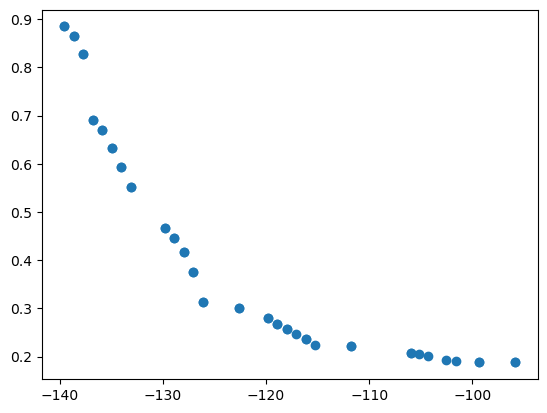

In [96]:
import matplotlib.pyplot as plt
plt.scatter(res['ObjV'][:,0],res['ObjV'][:,1])

In [12]:
def pe_simd(np_Vars):
    code = np_Vars[:21]/np.array([8]*5+[1]*16)
    channels = [64,64,128,256,512]
    layers = np_Vars[16:21].astype(int)
    out_channels = []
    for out_ch in range(5):
        out_channels += [(code[out_ch]*channels[out_ch]).astype(int)]*layers[out_ch]
    in_channels = [3]+out_channels[:-1]
    pe = []
    out_ch = 0
    for p in range(5):
        for layer_num in range(int(np_Vars[16+p])):
            while out_channels[out_ch] % (2**int(np_Vars[21+p])) != 0:
                np_Vars[21+p] -= 1
            pe += [2**int(np_Vars[21+p])]
            out_ch += 1
    if int(np_Vars[16])==2:
        simd = [int(np_Vars[26])]+[int(np_Vars[0]/8*64*0.5)]
        in_ch = 2
    else:
        simd = [int(np_Vars[26])]
        in_ch = 1

    for si in range(4):
        for layer_num in range(int(np_Vars[17+si])):
            while in_channels[in_ch] % (2**int(np_Vars[27+si])) != 0:
                np_Vars[27+si] -= 1
            simd += [2**int(np_Vars[27+si])]
            in_ch += 1
    return code,pe,simd
code,pe,simd = pe_simd(res['Vars'][32])
print("code = ",end='')
print([code[i] for i in range(21)])
print('pe = ',end='')
print(pe)
print('simd = ',end='')
print(simd)

code = [1.0, 0.875, 0.625, 1.0, 0.125, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 0.0, 2.0, 2.0, 2.0, 1.0, 2.0, 4.0, 3.0, 1.0, 2.0]
pe = [16, 16, 8, 8, 8, 8, 16, 16, 16, 32, 32, 32]
simd = [3, 32, 2, 2, 2, 2, 8, 8, 8, 8, 4, 4]


In [9]:
len(res['Vars'])

50

In [ ]:
3 7 8 10 12 13 14 18 26 31 35 36 37 32 4

In [ ]:
import sys
sys.path.append("../encode+decode/")
from decode import decode
con_map = {0:"acc+flops+params",1:"acc",2:"acc+flops",3:"acc+params",4:"flops",5:"params",6:"param+flops",7:"acc+latency"}
n = 108
for i in range(50):
    print("===========")
    print(i)
    decode(list(res['Vars'][i][:21].astype(int)),"cifar10",n=n,save=False,constrain = con_map[7])  

In [89]:
np_Vars = np.array([4., 3., 5., 1., 1., 0., 1., 1., 1., 0., 2., 2., 1., 1., 1., 0., 2., 2.,
        1., 6., 1., 3., 4., 2., 2., 4., 3., 3., 1., 3., 5.])
code = np_Vars[:21]/np.array([8]*5+[1]*16)
channels = [64,64,128,256,512]
layers = np_Vars[16:21].astype(int)
out_channels = []
for out_ch in range(5):
    out_channels += [(code[out_ch]*channels[out_ch]).astype(int)]*layers[out_ch]
in_channels = [3]+out_channels[:-1]
pe = []
out_ch = 0
for p in range(5):
    for layer_num in range(int(np_Vars[16+p])):
        while out_channels[out_ch] % (2**int(np_Vars[21+p])) != 0:
            np_Vars[21+p] -= 1
        pe += [2**int(np_Vars[21+p])]
        out_ch += 1
    print(out_ch-1,out_channels[out_ch-1],int(np_Vars[16+p]),2**int(np_Vars[21+p]))
    # Vars[i][21+p].data = torch.tensor(np_Vars[21+p])
# pe = [2**int(np_Vars[21])]*int(np_Vars[16])+[2**int(np_Vars[22])]*int(np_Vars[17])+[2**int(np_Vars[23])]*int(np_Vars[18])+[2**int(np_Vars[24])]*int(np_Vars[19])+[2**int(np_Vars[25])]*int(np_Vars[20])
if int(np_Vars[16])==2:
    simd = [int(np_Vars[26])]+[int(np_Vars[0]/8*64*0.5)]
    in_ch = 2
else:
    simd = [int(np_Vars[26])]
    in_ch = 1
# Vars[i][26].data = torch.tensor(np_Vars[26])
# print(layers,in_channels,out_channels,code[:],code[:5]*np.array([64,64,128,256,512]))
for si in range(4):
    for layer_num in range(int(np_Vars[17+si])):
        # print(in_ch,in_channels[in_ch],2**int(np_Vars[27+si]))
        while in_channels[in_ch] % (2**int(np_Vars[27+si])) != 0:
            np_Vars[27+si] -= 1
        simd += [2**int(np_Vars[27+si])]
        in_ch += 1
print(layers,in_channels,out_channels,code[:],code[:5]*np.array([64,64,128,256,512]),pe,simd)
# print(Vars)

1 32 2 8
3 24 2 8
4 80 1 4
10 32 6 4
11 64 1 16
[2 2 1 6 1] [3, 32, 32, 24, 24, 80, 32, 32, 32, 32, 32, 32] [32, 32, 24, 24, 80, 32, 32, 32, 32, 32, 32, 64] [0.5   0.375 0.625 0.125 0.125 0.    1.    1.    1.    0.    2.    2.
 1.    1.    1.    0.    2.    2.    1.    6.    1.   ] [32. 24. 80. 32. 64.] [8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 16] [3, 16, 8, 8, 2, 8, 8, 8, 8, 8, 8, 32]
